In [1]:
import pandas as pd
import re
import emoji

# Membaca dataset dari file CSV
df = pd.read_csv("dataset_youtube_naive_bayes.csv")

# Menampilkan data dari dataset
print(df.head())



            id comment
0  eVKXYUlxHMY     NaN
1  -IdZ0ENfEeY     NaN
2  w_Cse2kDmwE     NaN
3  _aNYmHSoJIM     NaN
4  ThykCE67kQQ     NaN


In [2]:
df_cleaned = df.dropna()
print(df_cleaned)

Empty DataFrame
Columns: [id, comment]
Index: []


In [3]:
def tweet_cleaner(words):
    # This will delete any emojis from the sentences
    words = emoji.replace_emoji(words, replace="")
    # This will transform all words to lowercase
    words = words.lower()
    # This will delete all mentions and hashtags
    words = re.sub("@[A-Za-z0-9]+", "", words)
    words = re.sub("#[A-Za-z0-9_]+", "", words)
    # This will delete links
    words = re.sub(r"http\S+", "", words)
    words = re.sub(r"www.\S+", "", words)
    # Delete character which are not a word character
    words = re.sub('\W+', ' ', words)
    return words

<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:13: SyntaxWarning: invalid escape sequence '\W'
C:\Users\patri\AppData\Local\Temp\ipykernel_10168\570175745.py:13: SyntaxWarning: invalid escape sequence '\W'
  words = re.sub('\W+', ' ', words)


In [4]:
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

#Penambahan simbol di akhir kalimat

def Preprocessing(input):
    #Handle duplicate symbols
#for i in range(len(data['DataAsli'])):
   # n, g in data.groupby(pd.Grouper(key='Tanggal',freq='W'))]
# weeks = [g for n, g in data.groupby(['Kategori'])]
    case_folding = input.lower()

    keep_word = re.sub(r"\d+", " ",case_folding)

    punctuation = re.sub(r'[^\w\s]','',keep_word)
    whitespace = re.sub('\s+',' ',punctuation)
    single_char = re.sub(r"\b[a-zA-Z]\b", "", whitespace)
    # menghapus emoticon yg terdapat pada kata
    rem_emoticon = single_char.encode('ascii', 'replace').decode('ascii')
    # proses tokenize
    tokens = nltk.tokenize.word_tokenize(rem_emoticon)
    stop = [word for word in tokens if not word in data]
    return stop

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\patri\AppData\Local\Temp\ipykernel_10168\2268044122.py:19: SyntaxWarning: invalid escape sequence '\s'
  whitespace = re.sub('\s+',' ',punctuation)


In [5]:
df.head()

,id,comment
0,eVKXYUlxHMY,NaN
1,-IdZ0ENfEeY,NaN
2,w_Cse2kDmwE,NaN
3,_aNYmHSoJIM,NaN
4,ThykCE67kQQ,NaN


In [6]:
df['id'] = df['comment'].factorize()[0]
from io import StringIO
category_id_df = df[['comment', 'id']].drop_duplicates().sort_values('id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['id', 'comment']].values)

In [7]:
df.head()

,id,comment
0,-1,NaN
1,-1,NaN
2,-1,NaN
3,-1,NaN
4,-1,NaN


In [8]:

import seaborn as sns

In [9]:
# Determine tweet sentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Mengubah nilai float menjadi string sebelum menggunakan 'encode'
df['comment'] = df['comment'].astype(str)

# Create a compound column with Vader
df['compound'] = df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,comment,compound,sentiment
0,-1,nan,0.0,neutral
1,-1,nan,0.0,neutral
2,-1,nan,0.0,neutral
3,-1,nan,0.0,neutral
4,-1,nan,0.0,neutral


In [ ]:
# Increase readability
df['sentiment'] = df['compound'].map(lambda x: "neutral" if -0.05 <= x <= 0.05 else ("positive" if x > 0.05 else "negative"))
df.head()


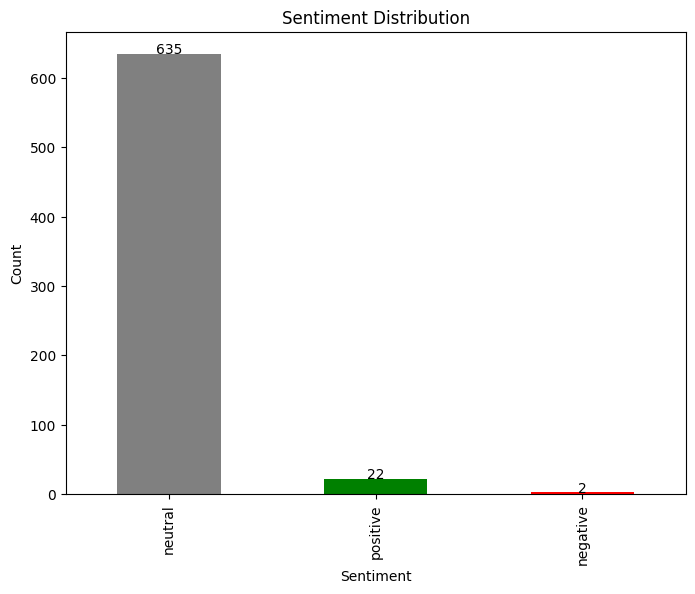

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'compound' and 'sentiment' columns

# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the count above each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()
